In [ ]:
from google.colab import files

uploaded = files.upload()
uploaded = files.upload()

Saving ANN emissions.csv to ANN emissions.csv


Saving Test.csv to Test (2).csv


Epoch 1/100
58/58 [==============================] - 1s 4ms/step - loss: 2097.6423 - val_loss: 418.5509
Epoch 2/100
58/58 [==============================] - 0s 2ms/step - loss: 303.1731 - val_loss: 284.9138
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 225.3983 - val_loss: 238.9575
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 182.9408 - val_loss: 202.7274
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 157.8669 - val_loss: 187.0055
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 145.3607 - val_loss: 174.7242
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 138.0727 - val_loss: 168.7955
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 131.4639 - val_loss: 164.6198
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 124.8631 - val_loss: 152.0668
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss

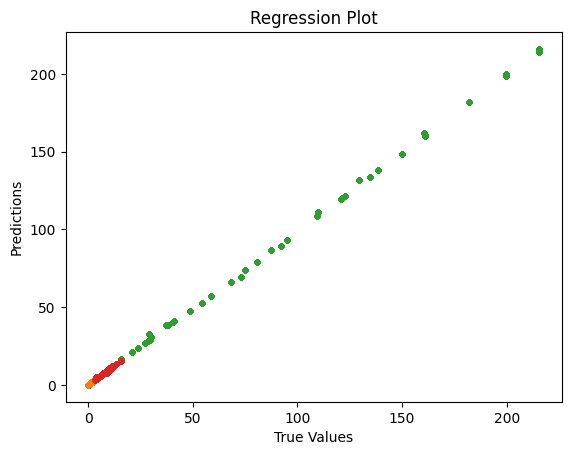

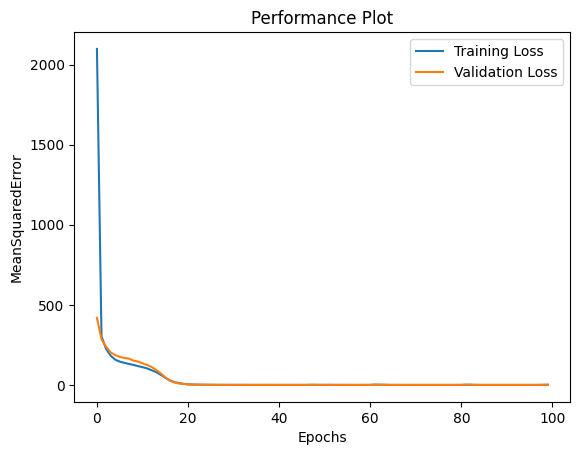

18/18 [==============================] - 0s 1ms/step


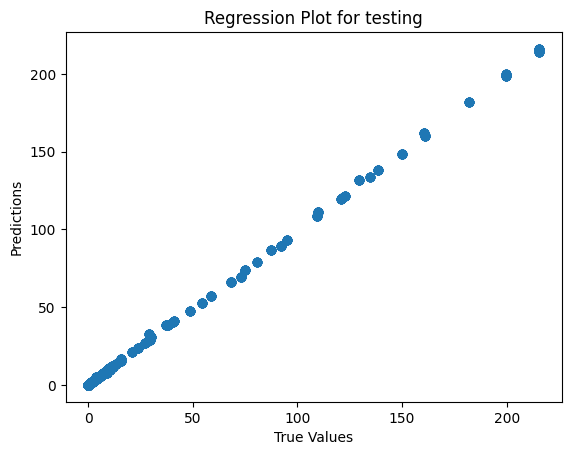

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               500       
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 4)                 404       
                                                                 
Total params: 31204 (121.89 KB)
Trainable params: 31204 (121.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
sc = StandardScaler()

data = pd.read_csv('ANN emissions.csv')
X = data[['Ethanol%', 'Methanol%', 'Gasoline%', 'RPM']]
Y = data[['CO', 'CO2', 'HC', 'NO']].values
X=sc.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=100,activation="relu"))
ann.add(tf.keras.layers.Dense(units=4))

ann.compile(optimizer="adam",loss="MeanSquaredError")
history=ann.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))
predictions = ann.predict(X)

#r squared value
print(r2_score(Y, predictions))

#Save predicted data
df=pd.read_csv('Test.csv')
l=df[['Methanol %', 'Ethanol %', 'Gasoline %', 'RPM']].values
p=ann.predict(sc.fit_transform(l))
save = pd.DataFrame(predictions)
s=pd.DataFrame(p)
save.to_csv("prediction.csv")
s.to_csv("p.csv")

#Regression Plot
plt.plot(Y, predictions, '.')
plt.title('Regression Plot')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#Performance Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Performance Plot')
plt.xlabel('Epochs')
plt.ylabel('MeanSquaredError')
plt.legend()
plt.show()

#  regression plot for testing data
Y_pred = ann.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.title('Regression Plot for testing')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

ann.summary()